# India Census

- The dataset describes about the people, diversity of habitation, religion, culture, language, education, health and socio-economic status of the country.
- The word ‘Census’ is derived from the Latin word ‘Censere’ meaning ‘to assess or to rate’.
- It covers demographic, social and economic data and are provided as of a particular date. Census is useful for formulation of development policies and plans and demarcating constituencies for elections.
- The Census of India has been conducted 15 times, As of 2011. It has been conducted every 10 years, beginning in 1871.

### Import Libraries

In [1]:
# If you run the notebook for the first time
# Uncomment the following line and install basemap

#!pip install basemap

In [3]:
import math
import operator
import numpy as np
import pandas as pd
import matplotlib.cm
import seaborn as sns
from itertools import groupby
import matplotlib.pyplot as plt
from __future__ import division
from matplotlib.patches import Polygon
from matplotlib.colors import Normalize
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection

### Read the Dataset

In [4]:
data = pd.read_csv("file.csv")

Print top 3 rows (head)

In [5]:
data.head(3)

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019


Print last 3 rows (tail)

In [6]:
data.tail(3)

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
637,638,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842,20727,16115,25332,17125,12714,4411,...,26077,343,119,0,6325,3668,1300,18786,12088,5922
638,639,ANDAMAN AND NICOBAR ISLANDS,North AND Middle Andaman,105597,54861,50736,78683,38579,30612,7967,...,21870,77,84,4,12707,10042,5133,57350,30741,17464
639,640,ANDAMAN AND NICOBAR ISLANDS,South Andaman,238142,127283,110859,190266,96831,77563,19268,...,33037,866,135,27,42150,29910,22388,128402,76332,33128


We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [7]:
# shape
data.shape

(640, 25)

Print information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   District_code         640 non-null    int64 
 1   State_name            640 non-null    object
 2   District_name         640 non-null    object
 3   Population            640 non-null    int64 
 4   Male                  640 non-null    int64 
 5   Female                640 non-null    int64 
 6   Literate              640 non-null    int64 
 7   Workers               640 non-null    int64 
 8   Male_Workers          640 non-null    int64 
 9   Female_Workers        640 non-null    int64 
 10  Cultivator_Workers    640 non-null    int64 
 11  Agricultural_Workers  640 non-null    int64 
 12  Household_Workers     640 non-null    int64 
 13  Hindus                640 non-null    int64 
 14  Muslims               640 non-null    int64 
 15  Christians            640 non-null    in

### Statistical Summary

This method gives a summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles.

In [9]:
data.describe()

,District_code,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,Agricultural_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,...,6.400000e+02,6.400000e+02,640.000000,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,7.529514e+05,5.186561e+05,2.342953e+05,1.856387e+05,2.255513e+05,...,4.346811e+04,3.255174e+04,13192.143750,6955.864062,2.051046e+05,1.241736e+05,1.090132e+05,1.102826e+06,4.820189e+05,3.001005e+05
std,184.896367,1.544380e+06,8.007785e+05,7.449864e+05,1.068583e+06,6.071622e+05,4.412388e+05,1.913541e+05,1.514895e+05,2.216222e+05,...,1.087273e+05,1.603859e+05,56347.946567,23624.010655,2.164778e+05,1.304154e+05,1.502260e+05,8.887434e+05,4.183230e+05,2.549556e+05
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,3.555000e+03,2.228000e+03,1.327000e+03,0.000000e+00,0.000000e+00,...,1.710000e+02,3.000000e+00,1.000000,0.000000,8.090000e+02,6.560000e+02,3.560000e+02,5.113000e+03,2.088000e+03,7.860000e+02
25%,160.750000,8.178610e+05,4.171682e+05,4.017458e+05,4.825982e+05,3.284688e+05,2.294168e+05,9.420350e+04,7.491025e+04,5.284175e+04,...,1.951750e+03,2.537500e+02,163.750000,124.750000,7.078575e+04,4.234700e+04,2.799200e+04,4.786540e+05,2.101965e+05,1.193285e+05
50%,320.500000,1.557367e+06,7.986815e+05,7.589200e+05,9.573465e+05,6.223410e+05,4.288515e+05,1.929265e+05,1.501250e+05,1.645300e+05,...,6.079500e+03,7.375000e+02,372.000000,741.000000,1.523325e+05,8.998700e+04,6.624350e+04,8.896820e+05,3.905085e+05,2.421020e+05
75%,480.250000,2.583551e+06,1.338604e+06,1.264277e+06,1.602260e+06,1.036544e+06,6.991510e+05,3.163658e+05,2.553015e+05,3.258982e+05,...,2.750850e+04,2.800000e+03,1942.500000,4150.750000,2.629160e+05,1.583555e+05,1.299488e+05,1.491204e+06,6.525142e+05,4.045875e+05
max,640.000000,1.106015e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.492767e+06,3.363123e+06,1.239177e+06,1.013050e+06,1.227956e+06,...,1.248137e+06,1.863408e+06,668050.000000,343639.000000,2.018079e+06,1.196965e+06,1.733274e+06,6.184519e+06,3.241888e+06,1.921143e+06


### Class Distribution

Let’s now take a look at the number of instances districts that belong to each state. We can view this as an absolute count.

In [10]:
# class distribution
print(data.groupby('State_name').size())

State_name
ANDAMAN AND NICOBAR ISLANDS     3
ANDHRA PRADESH                 23
ARUNACHAL PRADESH              16
ASSAM                          27
BIHAR                          38
CHANDIGARH                      1
CHHATTISGARH                   18
DADRA AND NAGAR HAVELI          1
DAMAN AND DIU                   2
GOA                             2
GUJARAT                        26
HARYANA                        21
HIMACHAL PRADESH               12
JAMMU AND KASHMIR              22
JHARKHAND                      24
KARNATAKA                      30
KERALA                         14
LAKSHADWEEP                     1
MADHYA PRADESH                 50
MAHARASHTRA                    35
MANIPUR                         9
MEGHALAYA                       7
MIZORAM                         8
NAGALAND                       11
NCT OF DELHI                    9
ORISSA                         30
PONDICHERRY                     4
PUNJAB                         20
RAJASTHAN                      33
SIK

### Show the records related with the districs - New Delhi, Lucknow, Jaipur.

In [12]:
data['District_name'].isin(['New Delhi', 'Lucknow', 'Jaipur'])

0      False
1      False
2      False
3      False
4      False
       ...  
635    False
636    False
637    False
638    False
639    False
Name: District_name, Length: 640, dtype: bool

In [13]:
data[data['District_name'].isin(['New Delhi', 'Lucknow', 'Jaipur'])]

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
93,94,NCT OF DELHI,New Delhi,142004,77942,64062,114179,59541,46940,12601,...,4852,2933,312,679,15942,17742,23934,76076,43913,21773
109,110,RAJASTHAN,Jaipur,6626178,3468507,3157671,4300965,2464893,1714947,749946,...,12708,18782,1020,81079,659389,455527,703673,4091148,1646480,884057
156,157,UTTAR PRADESH,Lucknow,4589838,2394476,2195362,3127260,1542806,1226399,316407,...,20493,23883,3877,4975,428121,378742,639260,2678289,1161686,685258


### Calculate state-wise:

#### A. Total number of population

#### B. Total no. of population with different religions

In [14]:
# Return the sorted results based on State_name
data.groupby('State_name').Population.sum()

State_name
ANDAMAN AND NICOBAR ISLANDS       380581
ANDHRA PRADESH                  84580777
ARUNACHAL PRADESH                1383727
ASSAM                           31205576
BIHAR                          104099452
CHANDIGARH                       1055450
CHHATTISGARH                    25545198
DADRA AND NAGAR HAVELI            343709
DAMAN AND DIU                     243247
GOA                              1458545
GUJARAT                         60439692
HARYANA                         25351462
HIMACHAL PRADESH                 6864602
JAMMU AND KASHMIR               12541302
JHARKHAND                       32988134
KARNATAKA                       61095297
KERALA                          33406061
LAKSHADWEEP                        64473
MADHYA PRADESH                  72626809
MAHARASHTRA                    112374333
MANIPUR                          2855794
MEGHALAYA                        2966889
MIZORAM                          1097206
NAGALAND                         1978502
NCT O

In [15]:
# Return the sorted results based on values (Ascending order)

data.groupby('State_name').Population.sum().sort_values()

State_name
LAKSHADWEEP                        64473
DAMAN AND DIU                     243247
DADRA AND NAGAR HAVELI            343709
ANDAMAN AND NICOBAR ISLANDS       380581
SIKKIM                            610577
CHANDIGARH                       1055450
MIZORAM                          1097206
PONDICHERRY                      1247953
ARUNACHAL PRADESH                1383727
GOA                              1458545
NAGALAND                         1978502
MANIPUR                          2855794
MEGHALAYA                        2966889
TRIPURA                          3673917
HIMACHAL PRADESH                 6864602
UTTARAKHAND                     10086292
JAMMU AND KASHMIR               12541302
NCT OF DELHI                    16787941
HARYANA                         25351462
CHHATTISGARH                    25545198
PUNJAB                          27743338
ASSAM                           31205576
JHARKHAND                       32988134
KERALA                          33406061
ORISS

In [16]:
# Return the sorted results based on values (Descending order)

data.groupby('State_name').Population.sum().sort_values(ascending=False)

State_name
UTTAR PRADESH                  199812341
MAHARASHTRA                    112374333
BIHAR                          104099452
WEST BENGAL                     91276115
ANDHRA PRADESH                  84580777
MADHYA PRADESH                  72626809
TAMIL NADU                      72147030
RAJASTHAN                       68548437
KARNATAKA                       61095297
GUJARAT                         60439692
ORISSA                          41974218
KERALA                          33406061
JHARKHAND                       32988134
ASSAM                           31205576
PUNJAB                          27743338
CHHATTISGARH                    25545198
HARYANA                         25351462
NCT OF DELHI                    16787941
JAMMU AND KASHMIR               12541302
UTTARAKHAND                     10086292
HIMACHAL PRADESH                 6864602
TRIPURA                          3673917
MEGHALAYA                        2966889
MANIPUR                          2855794
NAGAL

In [17]:
# All the columns in dataset
data.columns

Index(['District_code', 'State_name', 'District_name', 'Population', 'Male',
       'Female', 'Literate', 'Workers', 'Male_Workers', 'Female_Workers',
       'Cultivator_Workers', 'Agricultural_Workers', 'Household_Workers',
       'Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains',
       'Secondary_Education', 'Higher_Education', 'Graduate_Education',
       'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50'],
      dtype='object')

In [18]:
# B. Total no. of population with different religions

data.groupby('State_name')[['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains']].sum()

,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains
State_name,,,,,,
ANDAMAN AND NICOBAR ISLANDS,264296,32413,80984,1286,338,31
ANDHRA PRADESH,74824149,8082412,1129784,40244,36692,53849
ARUNACHAL PRADESH,401876,27045,418732,3287,162815,771
ASSAM,19180759,10679345,1165867,20672,54993,25949
BIHAR,86078686,17557809,129247,23779,25453,18914
CHANDIGARH,852574,51447,8720,138329,1160,1960
CHHATTISGARH,23819789,514998,490542,70036,70467,61510
DADRA AND NAGAR HAVELI,322857,12922,5113,217,634,1186
DAMAN AND DIU,220150,19277,2820,172,217,287


### Sort based on the 'Christians' column

In [19]:
data.groupby('State_name')[['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains']].sum().sort_values(by = 'Christians')

,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains
State_name,,,,,,
LAKSHADWEEP,1788,62268,317,8,10,11
DAMAN AND DIU,220150,19277,2820,172,217,287
DADRA AND NAGAR HAVELI,322857,12922,5113,217,634,1186
CHANDIGARH,852574,51447,8720,138329,1160,1960
HIMACHAL PRADESH,6532765,149881,12646,79896,78659,1805
JAMMU AND KASHMIR,3566674,8567485,35631,234848,112584,2490
UTTARAKHAND,8368636,1406825,37781,236340,14926,9183
HARYANA,22171128,1781342,50353,1243752,7514,52613
SIKKIM,352662,9867,60522,1868,167216,314


### How many Female Workers were in PUNJAB state?

In [20]:
data.head(3)

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019


In [21]:
data[data.State_name == 'PUNJAB']['Female_Workers'].sum()

1823205

### How to set a column as index of the dataframe

In [22]:
data.set_index('District_code')[:5]

,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
District_code,,,,,,,,,,,,,,,,,,,,,
1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,34680,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,55299,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,20869,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,8266,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,54264,...,958,11188,83,10,46062,29517,13962,304979,109818,61334


### How to add a Suffix to the column name

In [23]:
data.add_suffix('_EX1')[:3]

,District_code_EX1,State_name_EX1,District_name_EX1,Population_EX1,Male_EX1,Female_EX1,Literate_EX1,Workers_EX1,Male_Workers_EX1,Female_Workers_EX1,...,Christians_EX1,Sikhs_EX1,Buddhists_EX1,Jains_EX1,Secondary_Education_EX1,Higher_Education_EX1,Graduate_Education_EX1,Age_Group_0_29_EX1,Age_Group_30_49_EX1,Age_Group_50_EX1
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019


### How to add a Prefix to the column name

In [24]:
data.add_prefix('EX1_')[:3]

,EX1_District_code,EX1_State_name,EX1_District_name,EX1_Population,EX1_Male,EX1_Female,EX1_Literate,EX1_Workers,EX1_Male_Workers,EX1_Female_Workers,...,EX1_Christians,EX1_Sikhs,EX1_Buddhists,EX1_Jains,EX1_Secondary_Education,EX1_Higher_Education,EX1_Graduate_Education,EX1_Age_Group_0_29,EX1_Age_Group_30_49,EX1_Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019


### Extract MAHARASHTRA state

In [25]:
df = data[data['State_name'] == 'MAHARASHTRA']
df[:3]

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
496,497,MAHARASHTRA,Nandurbar,1648295,833170,815125,906509,792065,442898,349167,...,8467,685,4969,6191,160961,113019,58461,1011352,390419,241534
497,498,MAHARASHTRA,Dhule,2050862,1054031,996831,1293916,936370,570448,365922,...,3653,1422,13405,12818,290656,182739,114931,1167569,513908,350747
498,499,MAHARASHTRA,Jalgaon,4229917,2197365,2032552,2891882,1863571,1186472,677099,...,7091,3091,143865,27404,627198,375643,229987,2352671,1080237,763529


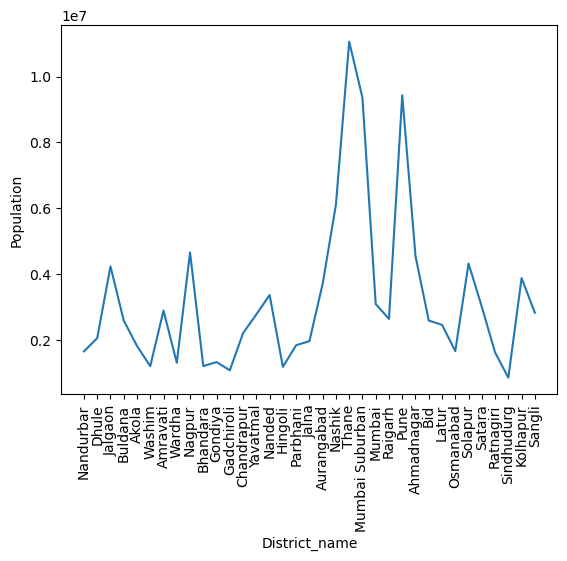

In [27]:
plt.plot(df["District_name"], df["Population"])
plt.xlabel('District_name')
plt.ylabel('Population')
plt.xticks(rotation=90);

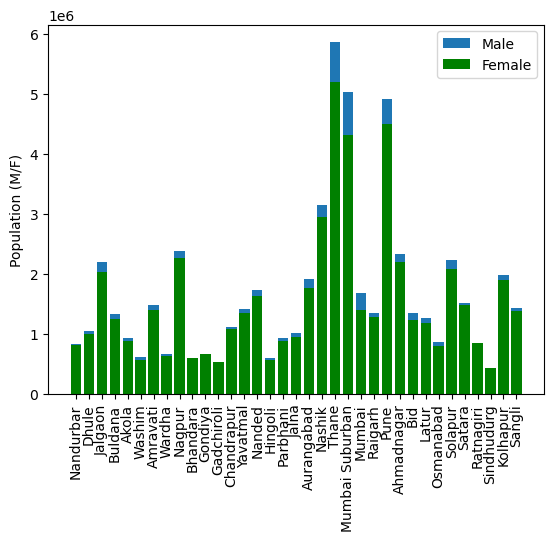

In [29]:
plt.bar(df["District_name"], df["Male"], label="Male")
plt.bar(df["District_name"], df["Female"], label="Female",color='g')
plt.ylabel('District_name')
plt.ylabel('Population (M/F)')
plt.legend()
plt.xticks(rotation=90);

### Analysis of Thane district

In [30]:
thane = df[df["District_name"] == "Thane"]
thane

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
516,517,MAHARASHTRA,Thane,11060148,5865078,5195070,8227161,4492767,3363123,1129644,...,280700,39149,449617,172052,1751284,1080597,961719,6184519,3241888,1579921


### Thane district sex ratio

/var/folders/25/j6_kp1v55376c5ldy5f8ns1r0000gn/T/ipykernel_2716/3346393678.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  Male = int(thane["Male"])
/var/folders/25/j6_kp1v55376c5ldy5f8ns1r0000gn/T/ipykernel_2716/3346393678.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  Female = int(thane["Female"])


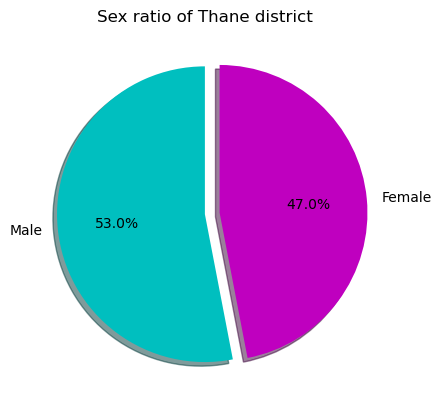

In [32]:
Male = int(thane["Male"])
Female = int(thane["Female"])
slices=[Male, Female]
labels = ["Male","Female"]
cols = ["c","m"]
plt.pie(slices,
        labels=labels,
        colors=cols,
        startangle=90,
        shadow= True,
        explode=(0,0.1),
        autopct='%1.1f%%')

plt.title('Sex ratio of Thane district')
plt.show()

In [33]:
# Number of Hindus in Thane
int(thane['Hindus'])

/var/folders/25/j6_kp1v55376c5ldy5f8ns1r0000gn/T/ipykernel_2716/2314834436.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  int(thane['Hindus'])


8716055

/var/folders/25/j6_kp1v55376c5ldy5f8ns1r0000gn/T/ipykernel_2716/2943641211.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  slices = [int(thane["Hindus"]),int(thane["Muslims"]),int(thane["Christians"]),int(thane["Sikhs"]),int(thane["Buddhists"]),int(thane["Jains"])]


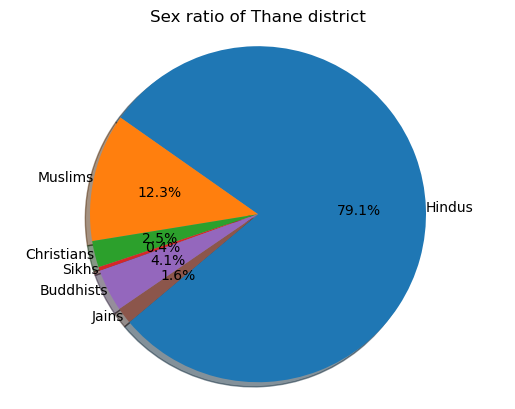

In [34]:
#Religion wise distribution of thane districts
slices = [int(thane["Hindus"]),int(thane["Muslims"]),int(thane["Christians"]),int(thane["Sikhs"]),int(thane["Buddhists"]),int(thane["Jains"])]

labels = ['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains']

plt.pie(slices,
        labels=labels,
        startangle=220,
        shadow= True,
        explode=(0,0,0,0,0,0),
        autopct='%1.1f%%',
       labeldistance=1)

plt.title('Sex ratio of Thane district')
plt.axis('equal')
plt.show()

### Create a geographic map of states with low literacy rates.

1. Group all the rows of the same state together
2. Iterate through each group and calculate the total population and total literate population for that particular state.
3. Literacy rate = (total literate population / total population) * 100
4. Store the results for each state
5. Plot the results in a geographic map of India

In [35]:
'''
Calculating state wise literacy rates
'''

# Group the data state-wise
states_group = data.groupby(by = "State_name")

# List for storing tuples which contain state-name and its corresponding literacy rate
literacy_rate = []

# Iterate through each group (a group has rows with the same state-name throughout the group)
# Here, key contains 'State_name' and group contains all the corresponding rows
for key , group in states_group:
    # Total population and total literate population across the state
    total_state_pop = 0
    total_literate_pop = 0
    # Iterate through all the rows of the group to get total state population and total literate state population
    for row in group.iterrows():
        total_state_pop += row[1][3] # 3 is the index of column 'Population'
        total_literate_pop += row[1][6] # 6 is the index of column 'Literate'
    
    # Calculate literacy rate for the state
    rate = (total_literate_pop/total_state_pop)*100
    # Store the result as a tuple in the list literacy_rate, contaning pairs of state names and literacy rates
    literacy_rate.append((key,rate))
    
print ("Statewise literacy rates : \n")
print (literacy_rate)

Statewise literacy rates : 

[('ANDAMAN AND NICOBAR ISLANDS', 77.32414387475991), ('ANDHRA PRADESH', 59.77334542575791), ('ARUNACHAL PRADESH', 55.35810170647822), ('ASSAM', 61.45689155040753), ('BIHAR', 50.43691584466746), ('CHANDIGARH', 76.31228385996495), ('CHHATTISGARH', 60.20670499402666), ('DADRA AND NAGAR HAVELI', 64.94738281511395), ('DAMAN AND DIU', 77.45460375667531), ('GOA', 79.9075105670377), ('GUJARAT', 67.99068069374013), ('HARYANA', 65.47546646422207), ('HIMACHAL PRADESH', 73.41628837330991), ('JAMMU AND KASHMIR', 56.351669069128555), ('JHARKHAND', 55.55958090869887), ('KARNATAKA', 66.5310162908284), ('KERALA', 84.2237101824127), ('LAKSHADWEEP', 81.51164053169543), ('MADHYA PRADESH', 59.00186114469107), ('MAHARASHTRA', 72.5737700262924), ('MANIPUR', 66.8282095977511), ('MEGHALAYA', 60.16419893025995), ('MIZORAM', 77.30316822912015), ('NAGALAND', 67.85103072930934), ('NCT OF DELHI', 75.87450420513153), ('ORISSA', 63.71195527692738), ('PONDICHERRY', 76.71034085418282), ('PU

/var/folders/25/j6_kp1v55376c5ldy5f8ns1r0000gn/T/ipykernel_2716/3825241254.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_state_pop += row[1][3] # 3 is the index of column 'Population'
/var/folders/25/j6_kp1v55376c5ldy5f8ns1r0000gn/T/ipykernel_2716/3825241254.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_literate_pop += row[1][6] # 6 is the index of column 'Literate'


**PLOTTING A GEOGRAPHIC MAP FOR STATEWISE LITERACY RATES**

**1. Getting coordinates**

We take help of this awesome tool called [Bounding box tool](https://boundingbox.klokantech.com/) for getting coordinates of India so that we can draw the same as a matplotlib plot. Search for 'India' in the search area provided. At the bottom there is a box with some longitude and latitudes in.

To the left of that there is a drop down menu, click that and select DublinCore; this is the easiest format to understand in my opinion and it’s in a form that can be directly used in Basemap. The first two numbers labeled ‘westlimit’ and ‘southlimit’ are the latitude and longitude of your lower left corner. The other two, labelled ‘eastlimit’ and ‘northlimit’ are the latitude and longitude of your upper right corner.

**2. Creating a map**

We will create a figure to draw our map on and then create our map. With the *drawmapboundary()* function we can set the colour of the seas and oceans on our map. Here I have set it to a light blue colour. The *fillcontinents()* function does just as it suggests, this is the colour of land masses. I have set them to a light-grey colour and have set lakes to the same colour as I set the sea. Finally, the *drawcoastlines()* function draws lines around the land masses.

**3. Using Shapefiles for drawing states**

Download shape file of India from [here](https://www.arcgis.com/home/item.html?id=cf9b387de48248a687aafdd4cdff1127). Using *readshapefile()* the shape file is loaded. The first argument is the path to the shapefile. The second is the name that will be used to access the shapefile.

**4. Creating a dataframe mapping shapes to literacy rates and state names**

Our shapefile contains multiple shapes for each state, so we need to map each state's literacy rate and state name correctly. We then create a dataframe combining all the three.

**5. Using data to color areas**

Finally, we color all the states according to their literacy rates. Darker shade represents higher literacy rates while a lighter shade represents a lower literacy rates.

/var/folders/25/j6_kp1v55376c5ldy5f8ns1r0000gn/T/ipykernel_2716/3932311.py:45: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  'shapes': [Polygon(np.array(shape), True) for shape in m.INDIA],
/var/folders/25/j6_kp1v55376c5ldy5f8ns1r0000gn/T/ipykernel_2716/3932311.py:54: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
/var/folders/25/j6_kp1v55376c5ldy5f8ns1r0000gn/T/ipykernel_2716/3932311.py:68: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *m

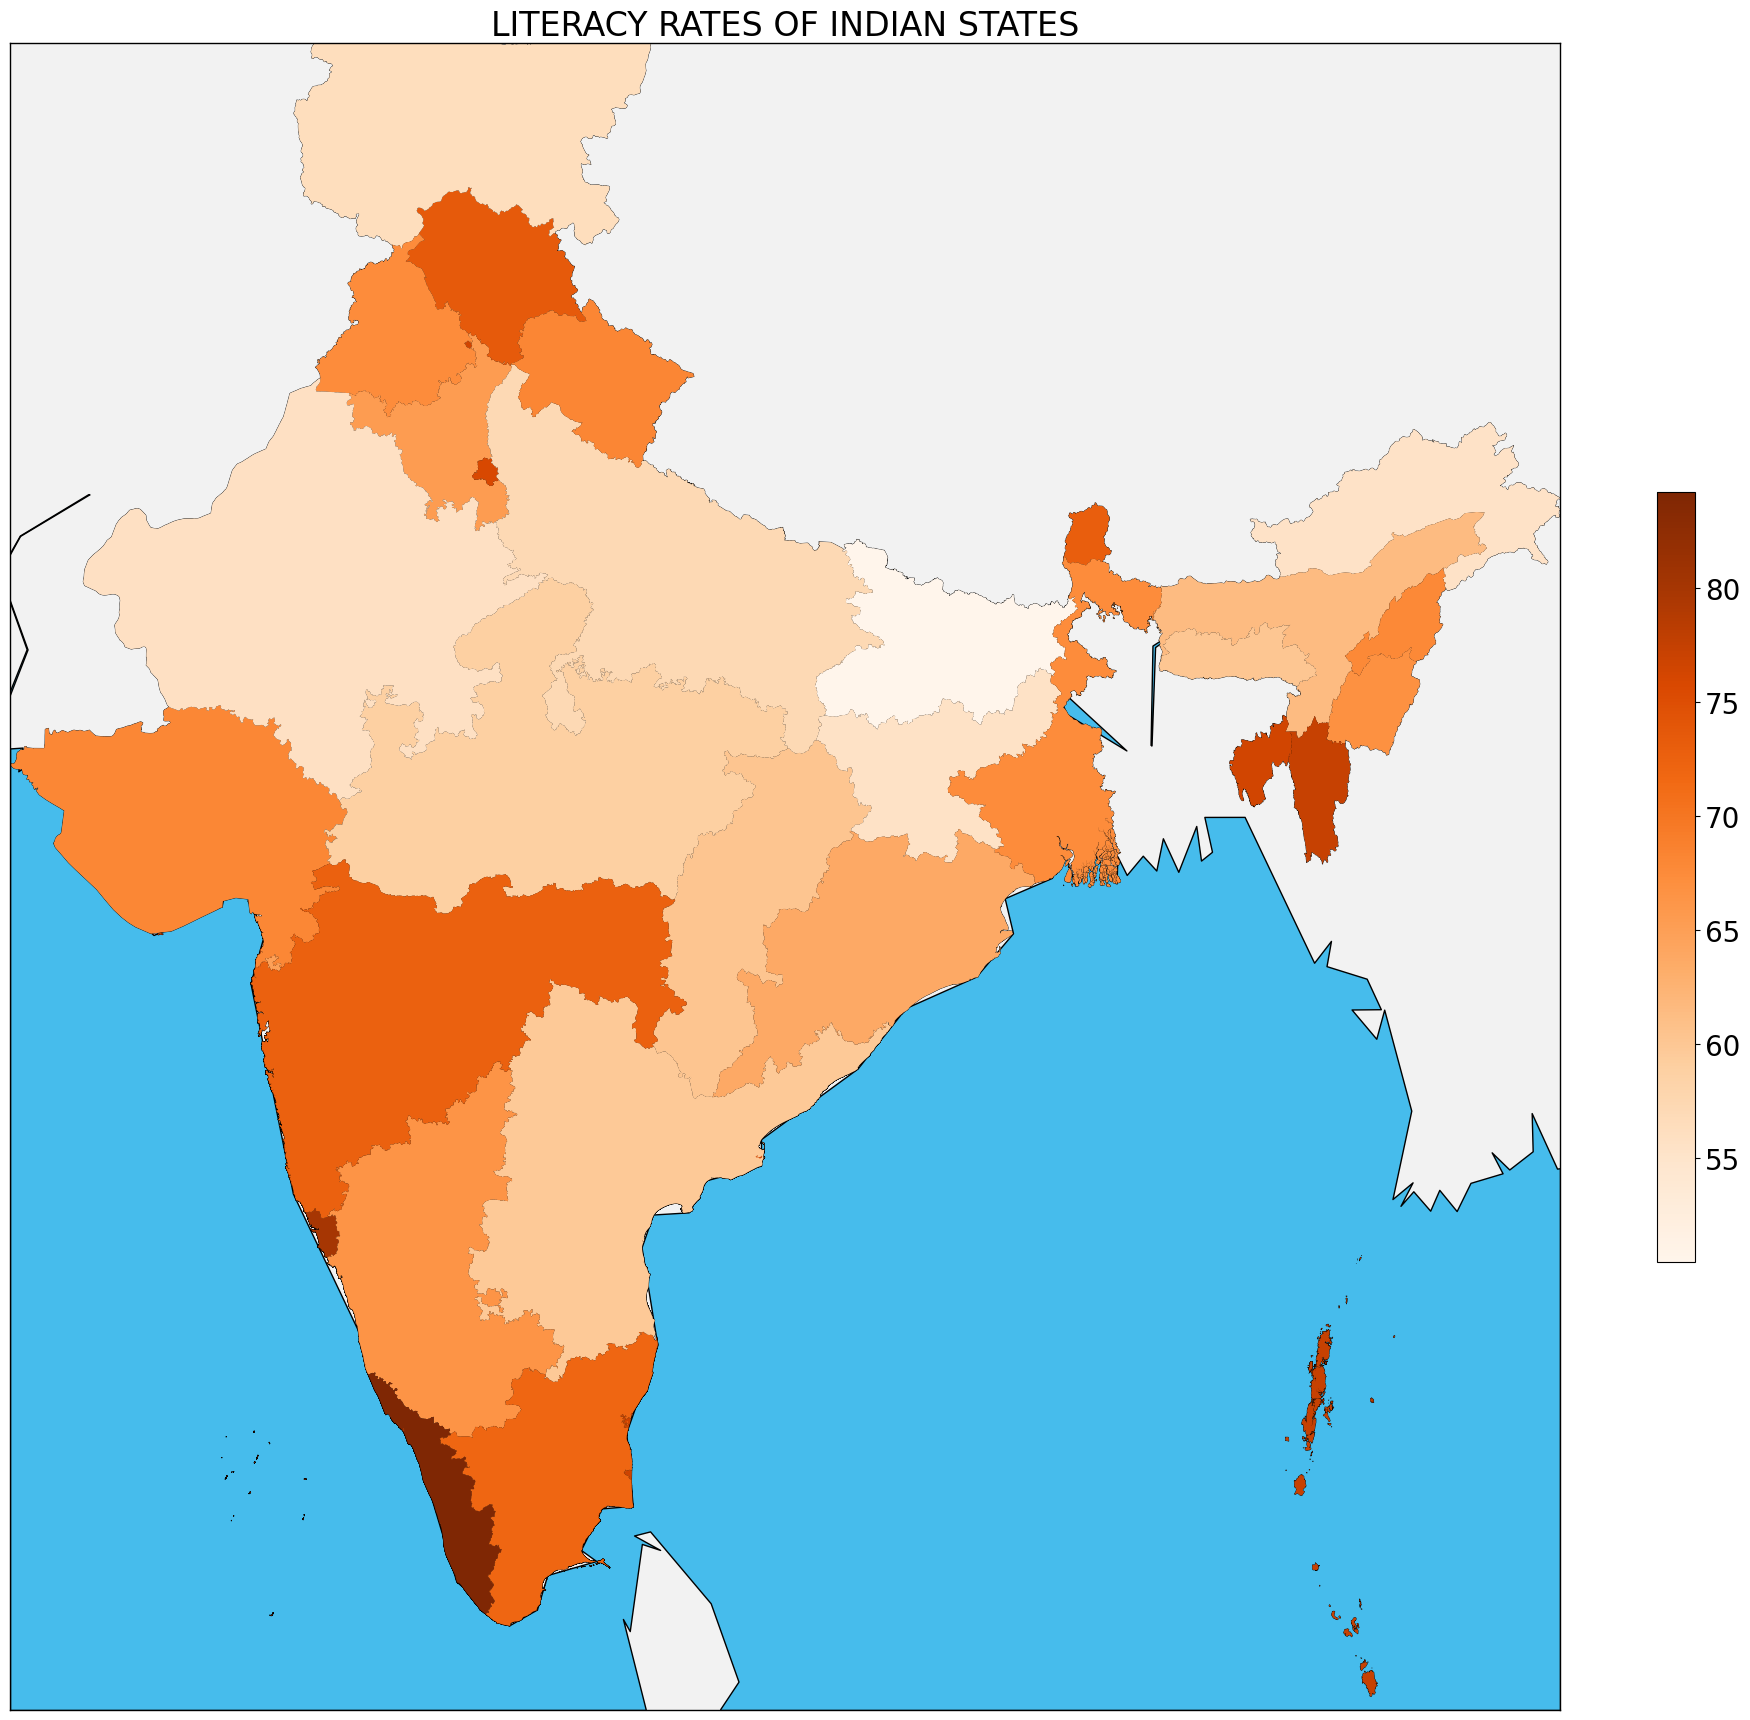

In [44]:
'''
2 : CREATING A MAP
'''
# Create figure 
fig, ax = plt.subplots()
# Create a map with the coordinates determined by the Bounding Box tool
m = Basemap(projection='merc',lat_0=54.5, lon_0=-4.36,llcrnrlon=68.1, llcrnrlat= 6.5, urcrnrlon=97.4, urcrnrlat=35.5)
# Draw map boundary and set the color
m.drawmapboundary(fill_color='#46bcec')
# Fill continents and lakes
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
# Draw coast lines
m.drawcoastlines()

'''
3 : USING SHAPEFILES FOR DRAWING STATES 
'''
# Load the shape file of India
m.readshapefile("INDIA","INDIA")


'''
4 : CREATING A DATAFRAME MAPPING SHAPES TO STATE NAME AND LITERACY RATES
'''
# Create an empty list to hold literacy rates
lit_rate = []
# Iterate through all rows of INDIA_info file
# Each row is a dictionary. Here, we try to map state name with literacy rate
for state_info in m.INDIA_info:
    # Get the state in uppercase, as our csv file has state names in upper case
    state = state_info['ST_NAME'].upper()
    # initialize rate = 0
    rate = 0
    
    # In literacy_rate (containing tuples of state name and literacy rates), search for state 'state'
    # Append its corresponding literacy rate to lit_rate
    for x in literacy_rate:
        if x[0] == state:
            rate = x[1]
            break
    lit_rate.append(rate)            
    
# Create a dataframe containing shapes, state names and literacy rates    
df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.INDIA],
        'area': [area['ST_NAME'] for area in m.INDIA_info],
        'lit_rate' : lit_rate
    })

'''
5 : USING DATA TO COLOR AREAS
'''
# Get all the shapes
shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
# Create a colormap
cmap = plt.get_cmap('Oranges')   
# Create a patch collection. Create patches on the top of the map, not beneath it (zorder=2)
pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
# Set color according to the literacy rate of the state
pc.set_facecolor(cmap(norm(df_poly['lit_rate'].fillna(0).values)))
ax.add_collection(pc)

# Create a mapper to map color intensities to values
mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(lit_rate)
plt.colorbar(mapper, shrink=0.4)
# Set title for the plot
ax.set_title("LITERACY RATES OF INDIAN STATES")
# Change plot size and font size
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams.update({'font.size': 20})
plt.show()

Lets inquire about the bottom 5 states with respect to literacy rates

In [46]:
literacy_rate.sort(key = operator.itemgetter(1))
print(literacy_rate[:5])

[('BIHAR', 50.43691584466746), ('ARUNACHAL PRADESH', 55.35810170647822), ('JHARKHAND', 55.55958090869887), ('RAJASTHAN', 55.8368413272501), ('JAMMU AND KASHMIR', 56.351669069128555)]


**States like Bihar, Arunachal Pradesh, Jharkhand, Rajasthan and Jammu Kashmir have low literacy rates. This can be also verified by the map of India visualized for literacy rates above as well.**

One important thing to note here is this:

Literacy is defined as the ability to read, write and use arithmetic, for people having **age more than 7 years.**

In our calculations, we have also counted children aged from 0-6 years in total population. The correct way to calculate it would be to subtract child population from total population and then compute the percentage.

Because there is no related column in our data which states no. of children (age 0-6), our results are slightly lesser than the actual literacy rates, but the overall visualization for the above heatmap seems reasonable and is relatable with the actual data.

### Find out most similar districts in Bihar and Tamil Nadu. Similarity can be based on any of the columns from the data.

First, let's subset our data by creating two different data frames for Bihar and Tamil Nadu

In [38]:
df_Bihar = data.loc[data['State_name'] == 'BIHAR']
df_Tamil_Nadu = data.loc[data['State_name'] == 'TAMIL NADU']

The Bihar dataframe:

In [39]:
df_Bihar.head(3)

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
202,203,BIHAR,Pashchim Champaran,3935042,2061110,1873932,1759481,1478947,999282,479665,...,8469,926,1337,296,159563,98732,70669,2544205,888205,497793
203,204,BIHAR,Purba Champaran,5099371,2681209,2418162,2276957,1737539,1260774,476765,...,4865,668,878,464,241118,121594,68781,3316422,1122340,648009
204,205,BIHAR,Sheohar,656246,346673,309573,283698,216372,166693,49679,...,522,216,73,52,25657,16031,10091,421241,139909,93398


and, for Tamil Nadu:

In [40]:
print("rows = %s"%(str(len(df_Tamil_Nadu))))

df_Tamil_Nadu.head(3)

rows = 32


,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
601,602,TAMIL NADU,Thiruvallur,3728104,1876062,1852042,2791721,1538054,1103563,434491,...,233633,1422,951,3693,622789,303091,451321,1925296,1154775,643614
602,603,TAMIL NADU,Chennai,4646732,2335844,2310888,3776276,1817297,1369302,447995,...,358662,2851,2804,51708,801050,464207,905515,2271657,1468902,899279
603,604,TAMIL NADU,Kancheepuram,3998252,2012958,1985294,3013382,1673814,1181308,492506,...,256762,1620,990,4962,634172,312208,526886,2076492,1200284,715895


**SIMILARITY**

To measure the similarity between two instances we can use the Euclidean distance measure. Similarity score is the inverse of Euclidean distance. Larger Euclidean distance corresponds to smaller similarity score and vice-versa.

However on observing the data we notice that the first three features are not numbers and also that the remaining features vary over a large range. In order to account for these we do the following:

- To find the euclidean distance we compute sum of squared differences of the attribute values for each column (between each row of Bihar districts and Tamil Nadu districts).

- Then, we compute the square root of the total sum computed above and inverse it. Resultant obtained is the similarity score.

- If features vary over a large range then the largest component will dominate the calculation of the similarity score. In order to avoid this we normalize the numerical attributes so that they fall between 0 and 1.

**CALCULATING SIMILAR DISTRICTS**

Putting all of this together we can define the *similar_districts()* function as follows:

In [41]:
def similar_districts(df1, df2):
    # Set indices for both the data frames
    df1.set_index('District_code')
    df2.set_index('District_code')
    
    # The similarity matrix of size len(df1) X len(df2)
    main_diff = []
    
    # Iterate through rows of df1
    for row1 in df1.iterrows(): 
        # Create list to hold similarity score of row1 with other rows of df2
        diff=[]
        # Iterate through rows of df2
        for row2 in df2.iterrows():
            # Calculate sum of squared differences
            dist = 0
            for column in list(data)[3:]:
                max_col = max(data[column])
                min_col = min(data[column]) 
    
                dist += pow((row1[1][column] - row2[1][column])/(max_col - min_col),2)
            # Take sqrt and inverse the result
            diff.append(1/math.sqrt(dist))
        # Append similarity scores
        main_diff.append(diff)

    # Find the max value of similarity score from lists of lists
    max_val = 0
    max_index1 = 0
    max_index2 = 0
    for i in range(len(main_diff)):

        for j in range(len(main_diff[i])):
            if(main_diff[i][j] > max_val):
                max_val = main_diff[i][j]
                max_index1 = i
                max_index2 = j

    print("%s from Bihar and %s from Tamil Nadu are most similar" %(df1['District_name'].iloc[max_index1],
                                                                    df2['District_name'].iloc[max_index2]))
    return main_diff
    
sim_matrix = similar_districts(df_Bihar, df_Tamil_Nadu)

Sheikhpura from Bihar and Perambalur from Tamil Nadu are most similar


**PLOTTING THE SIMILARITY MATRIX**

We plot the similarity matrix using seaborn after normalizing it so that the values range between 0 and 1. Cell with the darkest shade represents the highest similarity score. Similarity score for the cell corresponding to Sheohar(Bihar) and Perambur(Tamil Nadu) is the highest. Hence, these two districts are most similar.

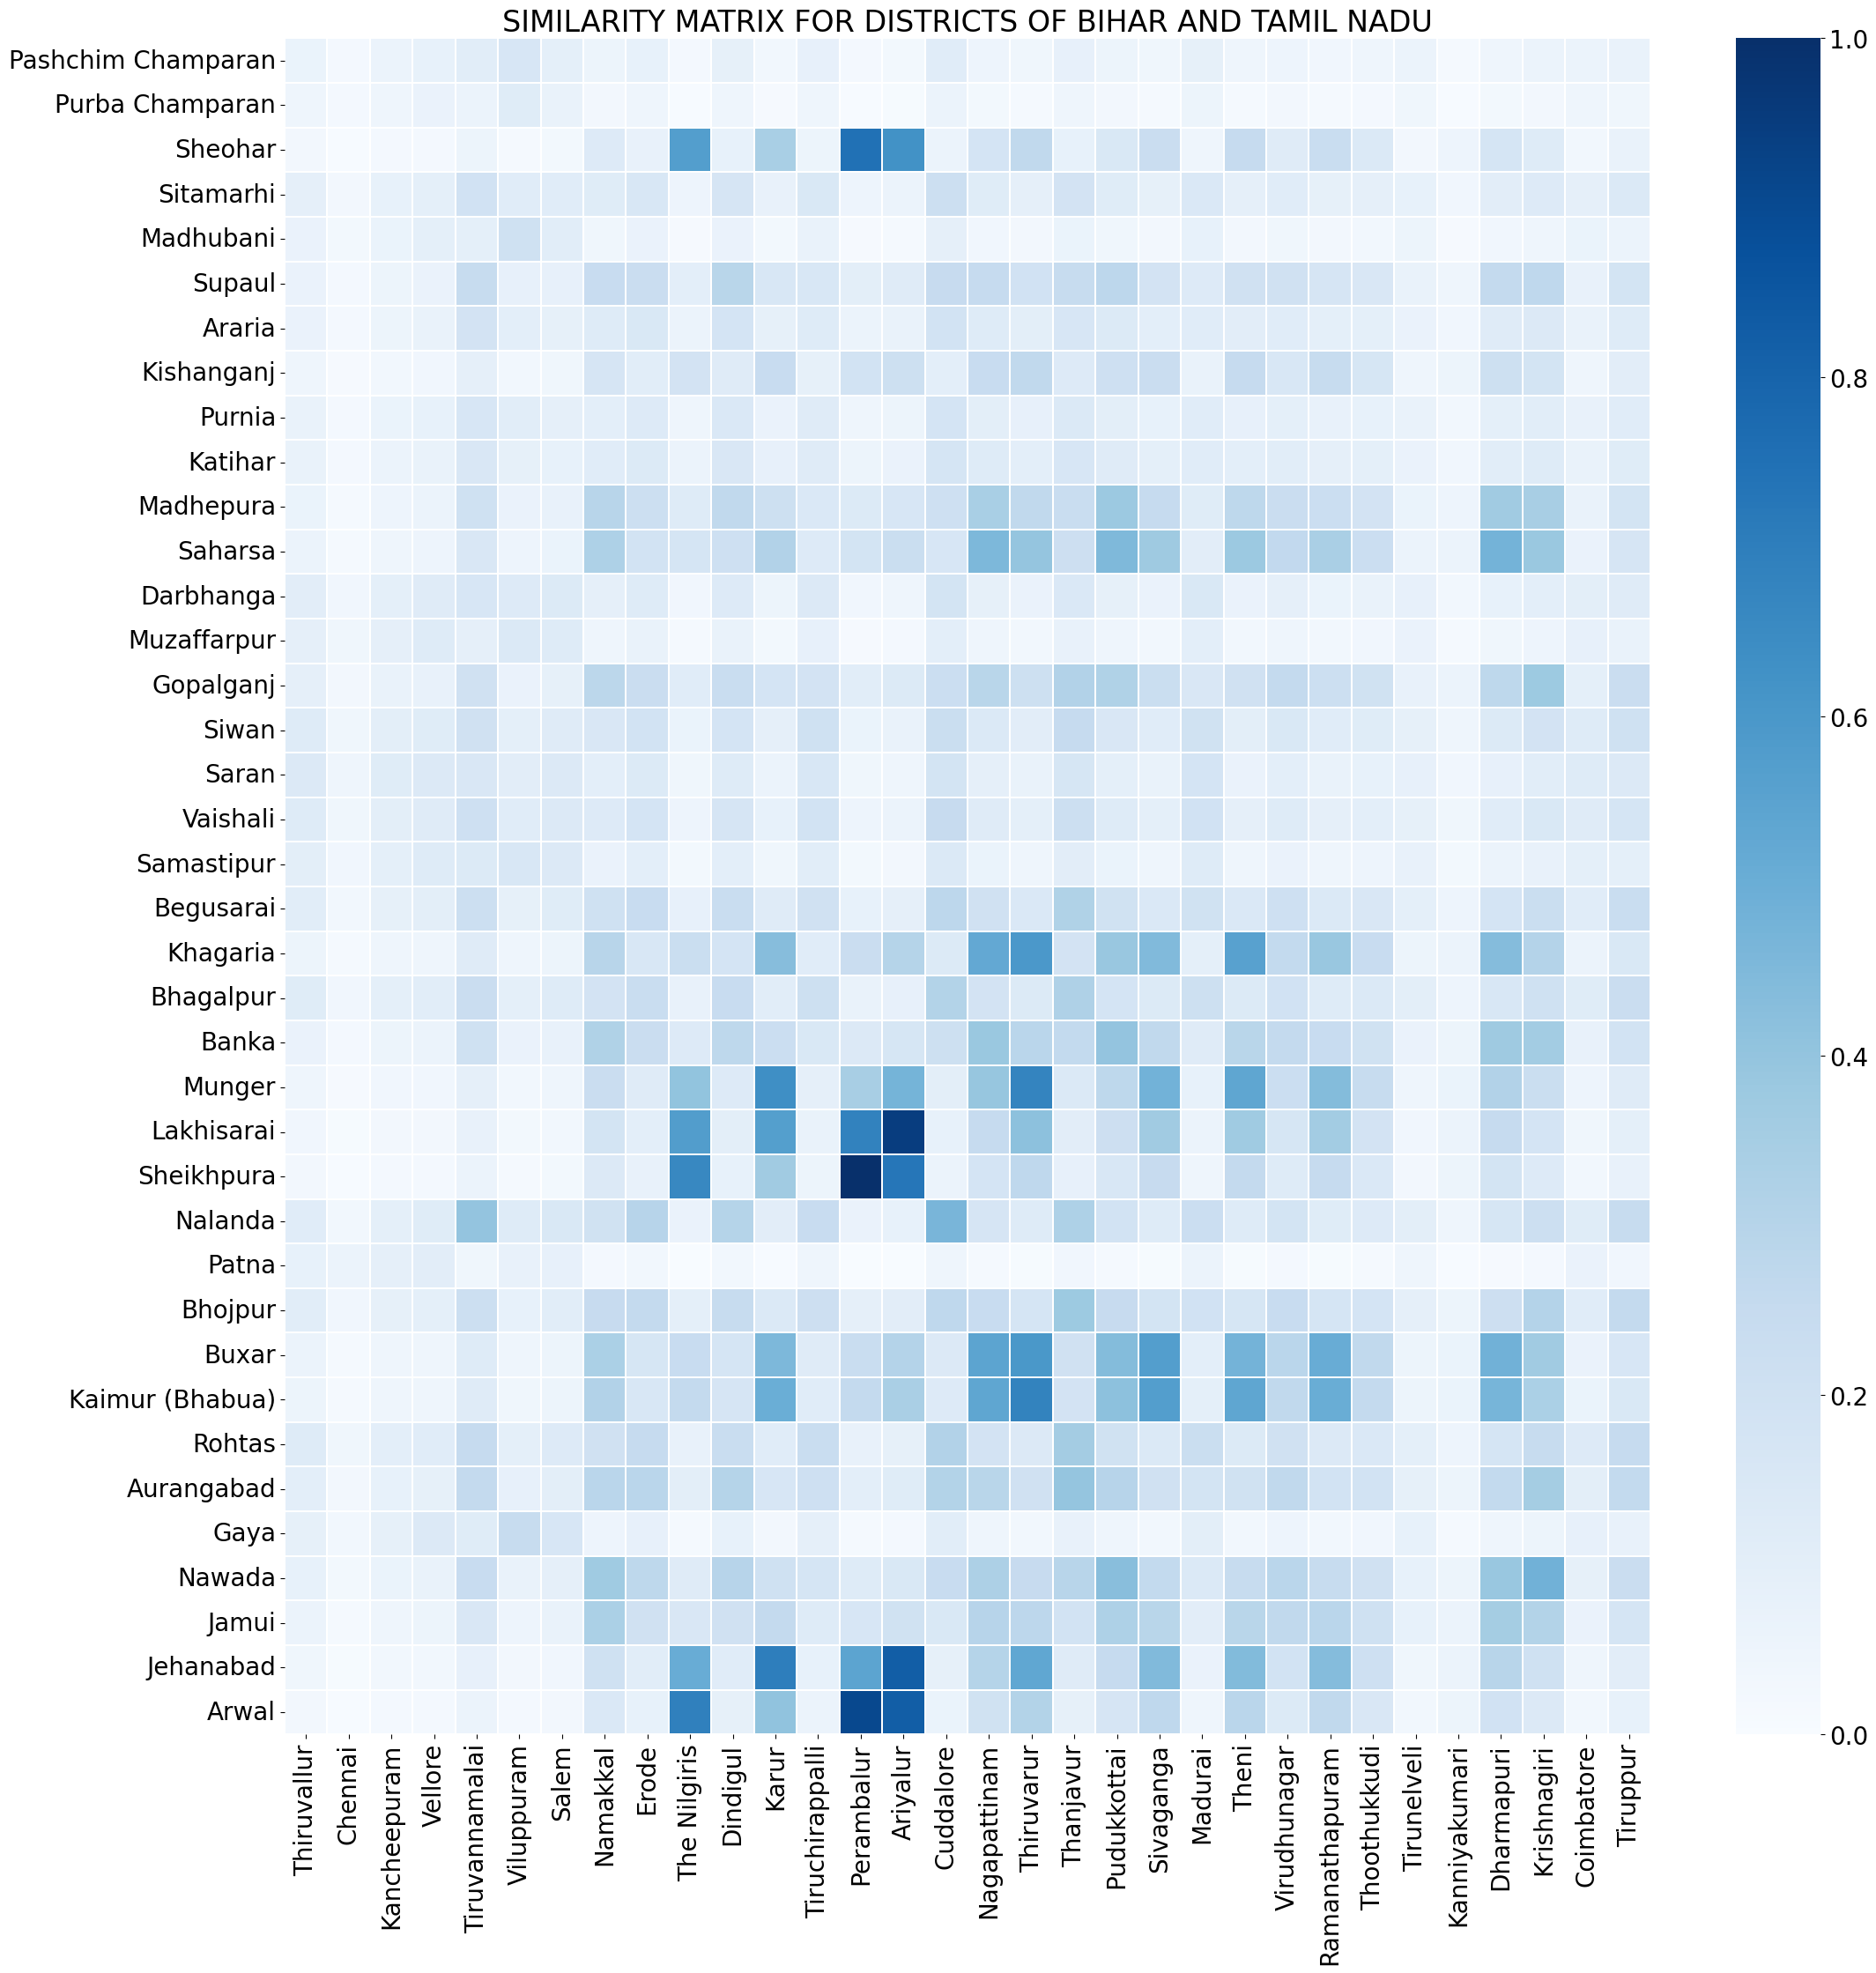

In [43]:
norm=Normalize()
ax = plt.axes()
# Plot the matrix using a heatmap from seaborn
# Values of the matrix are normalized so as to fall between 0 and 1
sns.heatmap(norm(sim_matrix), xticklabels=df_Tamil_Nadu['District_name'],yticklabels=df_Bihar['District_name'],
            linewidths=0.05,cmap='Blues').set_title("SIMILARITY MATRIX FOR DISTRICTS OF BIHAR AND TAMIL NADU")
plt.rcParams['figure.figsize'] = (25,25)